In [65]:
import networkx as nx
import scipy as scp

In [66]:
def grid(xdim, ydim):
    G = nx.DiGraph()
    label = lambda i, j: (i, j)
    G.add_nodes_from([label(i, j) for i in range(ydim) for j in range(xdim)])
    for i in range(xdim):
        for j in range(ydim):
            if i < xdim-1:
                G.add_edges_from([(label(i, j), label(i+1, j))])
            if j < ydim-1:
                G.add_edges_from([(label(i, j), label(i, j+1))])
    return G

In [71]:
def chainids(G):
    nbits, chain_ids = chainids_rec(G, (0, 0), 1, dict())
    for key in chain_ids:
        chain_ids[key] = [0] * (nbits - len(chain_ids[key])) + chain_ids[key]
    return nbits, chain_ids
def chainids_rec(G, current_node, n_bits_used, chain_ids):
    initial_n_bits_used = n_bits_used
    chain_ids[current_node] = [1] + [0] * (
        n_bits_used - len(chain_ids.get(current_node, [])) - 1
    ) + chain_ids.get(current_node, [])
    for i, successor in enumerate(G.neighbors(current_node)):
        n_bits_used, chain_ids = chainids_rec(
            G,
            successor,
            n_bits_used if i == 0 else n_bits_used + 1,
            chain_ids
        )
    chain_ids[current_node] = [1] * (
        n_bits_used - initial_n_bits_used
    ) + chain_ids[current_node]
    return n_bits_used, chain_ids

In [80]:
def draw(G, ids):
    nx.draw_spectral(
        G,
        node_size=500,
        node_color='pink',
        alpha=0.5,
        labels={ node: ids[node] for node in G.nodes() })

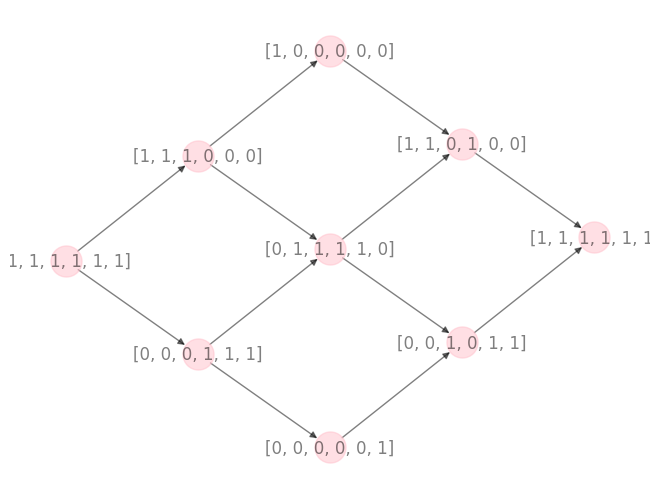

In [81]:
G = grid(3, 3)
_, ids = chainids(G)
draw(G, ids)